In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [3]:
# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [4]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [5]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [7]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [8]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [9]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 1 of 200
Generator loss: 0.01612849, Discriminator loss: 0.00335048


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 2 of 200
Generator loss: 0.00837046, Discriminator loss: 0.02167995


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 3 of 200
Generator loss: 0.00797152, Discriminator loss: 0.00986370


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 4 of 200
Generator loss: 0.03372151, Discriminator loss: 0.00434926


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.65it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


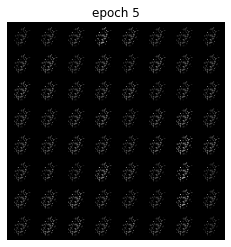

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 5 of 200
Generator loss: 0.00305530, Discriminator loss: 0.01234022


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 6 of 200
Generator loss: 0.01031384, Discriminator loss: 0.00869322


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.79it/s]

Epoch 7 of 200
Generator loss: 0.00782796, Discriminator loss: 0.01590781


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 8 of 200
Generator loss: 0.00315528, Discriminator loss: 0.02373090


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 9 of 200
Generator loss: 0.00348895, Discriminator loss: 0.02130436


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.31it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


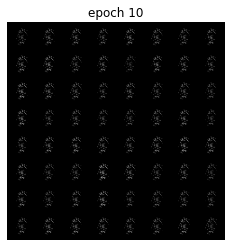

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 10 of 200
Generator loss: 0.01535873, Discriminator loss: 0.00629862


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 11 of 200
Generator loss: 0.01189930, Discriminator loss: 0.01045537


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 12 of 200
Generator loss: 0.01581782, Discriminator loss: 0.01003079


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 13 of 200
Generator loss: 0.00638395, Discriminator loss: 0.01068114


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 14 of 200
Generator loss: 0.01061146, Discriminator loss: 0.00972212


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.30it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


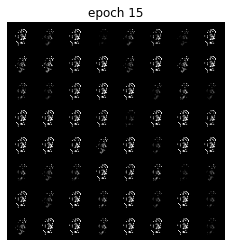

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 15 of 200
Generator loss: 0.02674083, Discriminator loss: 0.00484698


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.43it/s]

Epoch 16 of 200
Generator loss: 0.02017114, Discriminator loss: 0.00907035


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 17 of 200
Generator loss: 0.00893267, Discriminator loss: 0.01297128


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 18 of 200
Generator loss: 0.01372968, Discriminator loss: 0.00775499


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 19 of 200
Generator loss: 0.01094038, Discriminator loss: 0.00949358


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.38it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


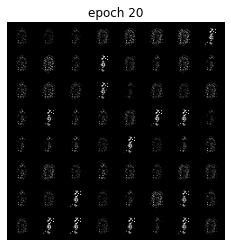

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 20 of 200
Generator loss: 0.01426740, Discriminator loss: 0.00901747


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 21 of 200
Generator loss: 0.01721072, Discriminator loss: 0.00630569


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 22 of 200
Generator loss: 0.01942768, Discriminator loss: 0.00616942


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 23 of 200
Generator loss: 0.02111777, Discriminator loss: 0.00611892


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 24 of 200
Generator loss: 0.01824431, Discriminator loss: 0.00459935


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 14.82it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


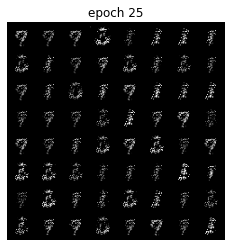

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.25it/s]

Epoch 25 of 200
Generator loss: 0.01529405, Discriminator loss: 0.00838832


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 26 of 200
Generator loss: 0.02402508, Discriminator loss: 0.00674605


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 27 of 200
Generator loss: 0.01622468, Discriminator loss: 0.00487437


  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.12it/s]

Epoch 28 of 200
Generator loss: 0.01746556, Discriminator loss: 0.00662187


  2%|█▍                                                                                | 2/117 [00:00<00:08, 13.64it/s]

Epoch 29 of 200
Generator loss: 0.01968054, Discriminator loss: 0.00620288


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:08<00:00, 13.91it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


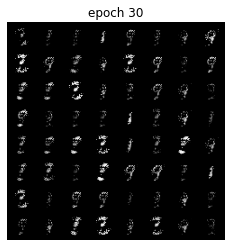

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.43it/s]

Epoch 30 of 200
Generator loss: 0.01914018, Discriminator loss: 0.00533889


  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.02it/s]

Epoch 31 of 200
Generator loss: 0.01996423, Discriminator loss: 0.00542662


  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.27it/s]

Epoch 32 of 200
Generator loss: 0.01401353, Discriminator loss: 0.00800082


  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.27it/s]

Epoch 33 of 200
Generator loss: 0.02049699, Discriminator loss: 0.00735460


  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.32it/s]

Epoch 34 of 200
Generator loss: 0.01228094, Discriminator loss: 0.00773239


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:08<00:00, 14.19it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


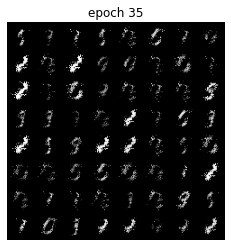

  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.32it/s]

Epoch 35 of 200
Generator loss: 0.02061703, Discriminator loss: 0.00902049


  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.27it/s]

Epoch 36 of 200
Generator loss: 0.01907224, Discriminator loss: 0.00814292


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.53it/s]

Epoch 37 of 200
Generator loss: 0.01171537, Discriminator loss: 0.00874599


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 38 of 200
Generator loss: 0.01800062, Discriminator loss: 0.00520746


  2%|█▍                                                                                | 2/117 [00:00<00:08, 13.41it/s]

Epoch 39 of 200
Generator loss: 0.01815489, Discriminator loss: 0.00828813


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:08<00:00, 13.81it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


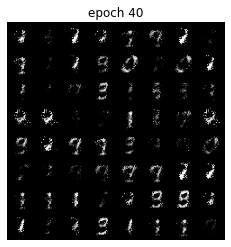

  2%|█▍                                                                                | 2/117 [00:00<00:08, 13.93it/s]

Epoch 40 of 200
Generator loss: 0.01604895, Discriminator loss: 0.00676103


  2%|█▍                                                                                | 2/117 [00:00<00:08, 13.28it/s]

Epoch 41 of 200
Generator loss: 0.01471132, Discriminator loss: 0.00569952


  2%|█▍                                                                                | 2/117 [00:00<00:08, 13.93it/s]

Epoch 42 of 200
Generator loss: 0.01744761, Discriminator loss: 0.00655788


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.43it/s]

Epoch 43 of 200
Generator loss: 0.01763155, Discriminator loss: 0.00525077


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.64it/s]

Epoch 44 of 200
Generator loss: 0.01618256, Discriminator loss: 0.00593604


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 14.81it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


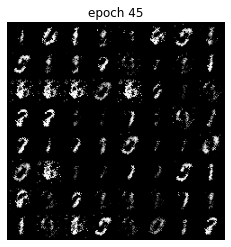

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 45 of 200
Generator loss: 0.01771261, Discriminator loss: 0.00593073


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 46 of 200
Generator loss: 0.01459412, Discriminator loss: 0.00976439


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.48it/s]

Epoch 47 of 200
Generator loss: 0.01770834, Discriminator loss: 0.00836435


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 48 of 200
Generator loss: 0.01985653, Discriminator loss: 0.00561786


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 49 of 200
Generator loss: 0.01283418, Discriminator loss: 0.00769090


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 14.95it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


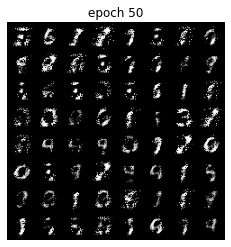

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 50 of 200
Generator loss: 0.01321780, Discriminator loss: 0.00646502


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 51 of 200
Generator loss: 0.01695044, Discriminator loss: 0.00571263


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 52 of 200
Generator loss: 0.01562280, Discriminator loss: 0.00611203


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 53 of 200
Generator loss: 0.01560670, Discriminator loss: 0.00679291


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.69it/s]

Epoch 54 of 200
Generator loss: 0.01127586, Discriminator loss: 0.00923592


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 14.85it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


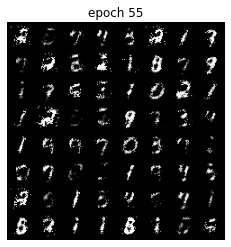

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 55 of 200
Generator loss: 0.01843010, Discriminator loss: 0.00830415


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.58it/s]

Epoch 56 of 200
Generator loss: 0.01546124, Discriminator loss: 0.00671590


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.69it/s]

Epoch 57 of 200
Generator loss: 0.01465025, Discriminator loss: 0.00866942


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 58 of 200
Generator loss: 0.01678501, Discriminator loss: 0.00772270


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 59 of 200
Generator loss: 0.01359057, Discriminator loss: 0.00803057


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 14.57it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


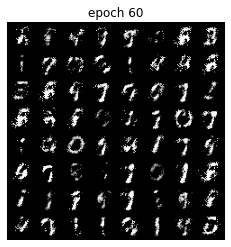

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.74it/s]

Epoch 60 of 200
Generator loss: 0.01106715, Discriminator loss: 0.00870914


  2%|█▍                                                                                | 2/117 [00:00<00:08, 14.17it/s]

Epoch 61 of 200
Generator loss: 0.01426177, Discriminator loss: 0.00626557


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.58it/s]

Epoch 62 of 200
Generator loss: 0.01364665, Discriminator loss: 0.00816974


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.43it/s]

Epoch 63 of 200
Generator loss: 0.01936714, Discriminator loss: 0.00665650


  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.01it/s]

Epoch 64 of 200
Generator loss: 0.01417421, Discriminator loss: 0.00711235


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 14.95it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


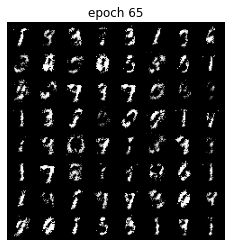

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 65 of 200
Generator loss: 0.01478627, Discriminator loss: 0.00580402


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.69it/s]

Epoch 66 of 200
Generator loss: 0.01312847, Discriminator loss: 0.00764062


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 67 of 200
Generator loss: 0.01588662, Discriminator loss: 0.00657312


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.64it/s]

Epoch 68 of 200
Generator loss: 0.01994443, Discriminator loss: 0.00648912


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 69 of 200
Generator loss: 0.01921683, Discriminator loss: 0.00707028


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.24it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


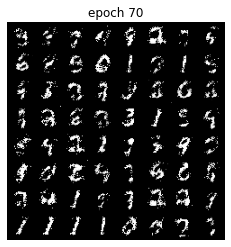

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 70 of 200
Generator loss: 0.01661545, Discriminator loss: 0.00505032


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 71 of 200
Generator loss: 0.01680551, Discriminator loss: 0.00661244


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 72 of 200
Generator loss: 0.01465664, Discriminator loss: 0.00564745


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 73 of 200
Generator loss: 0.01786195, Discriminator loss: 0.00628741


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 74 of 200
Generator loss: 0.01332159, Discriminator loss: 0.00604322


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.29it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


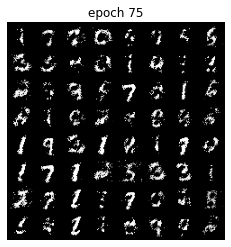

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 75 of 200
Generator loss: 0.01732755, Discriminator loss: 0.00617610


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.69it/s]

Epoch 76 of 200
Generator loss: 0.01689813, Discriminator loss: 0.00776477


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 77 of 200
Generator loss: 0.01982582, Discriminator loss: 0.00630369


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 78 of 200
Generator loss: 0.01931010, Discriminator loss: 0.00672906


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 79 of 200
Generator loss: 0.01782216, Discriminator loss: 0.00837562


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.32it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


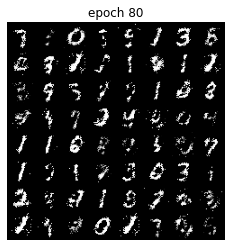

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.25it/s]

Epoch 80 of 200
Generator loss: 0.01744241, Discriminator loss: 0.00608650


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 81 of 200
Generator loss: 0.01642885, Discriminator loss: 0.00680384


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 82 of 200
Generator loss: 0.01843115, Discriminator loss: 0.00787490


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 83 of 200
Generator loss: 0.01363823, Discriminator loss: 0.00650594


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 84 of 200
Generator loss: 0.01153817, Discriminator loss: 0.00739143


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.30it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


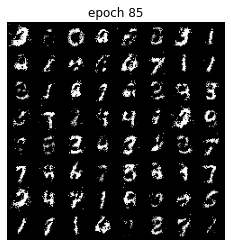

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 85 of 200
Generator loss: 0.01484732, Discriminator loss: 0.00689390


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 86 of 200
Generator loss: 0.02338444, Discriminator loss: 0.00733222


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 87 of 200
Generator loss: 0.01800118, Discriminator loss: 0.00613110


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 88 of 200
Generator loss: 0.01625343, Discriminator loss: 0.00592906


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 89 of 200
Generator loss: 0.01905215, Discriminator loss: 0.00623550


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.30it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


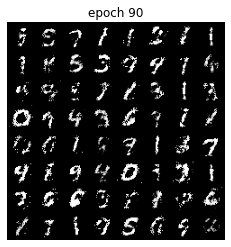

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.80it/s]

Epoch 90 of 200
Generator loss: 0.01699291, Discriminator loss: 0.00579422


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 91 of 200
Generator loss: 0.02173020, Discriminator loss: 0.00714385


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.69it/s]

Epoch 92 of 200
Generator loss: 0.01953891, Discriminator loss: 0.00610777


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.43it/s]

Epoch 93 of 200
Generator loss: 0.01580439, Discriminator loss: 0.00833970


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 94 of 200
Generator loss: 0.01345416, Discriminator loss: 0.00614643


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.33it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


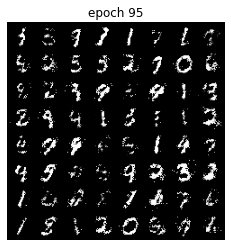

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 95 of 200
Generator loss: 0.02186847, Discriminator loss: 0.00669812


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 96 of 200
Generator loss: 0.01682742, Discriminator loss: 0.00692497


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.01it/s]

Epoch 97 of 200
Generator loss: 0.01481992, Discriminator loss: 0.00703432


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 98 of 200
Generator loss: 0.01387199, Discriminator loss: 0.00570923


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.25it/s]

Epoch 99 of 200
Generator loss: 0.01807658, Discriminator loss: 0.00784441


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.25it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


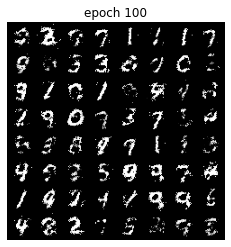

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 100 of 200
Generator loss: 0.01745255, Discriminator loss: 0.00756288


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 101 of 200
Generator loss: 0.01269176, Discriminator loss: 0.00756329


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.96it/s]

Epoch 102 of 200
Generator loss: 0.01255725, Discriminator loss: 0.00808219


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 103 of 200
Generator loss: 0.01417291, Discriminator loss: 0.00572308


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.13it/s]

Epoch 104 of 200
Generator loss: 0.01520688, Discriminator loss: 0.00682066


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.35it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


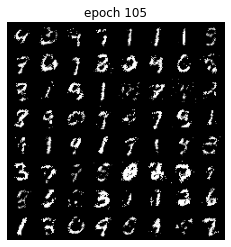

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 105 of 200
Generator loss: 0.01255261, Discriminator loss: 0.00692534


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 106 of 200
Generator loss: 0.01519472, Discriminator loss: 0.00769855


  2%|█▍                                                                                | 2/117 [00:00<00:08, 13.93it/s]

Epoch 107 of 200
Generator loss: 0.01583223, Discriminator loss: 0.00737160


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 108 of 200
Generator loss: 0.01259599, Discriminator loss: 0.00809933


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.53it/s]

Epoch 109 of 200
Generator loss: 0.01485380, Discriminator loss: 0.00642007


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 14.93it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


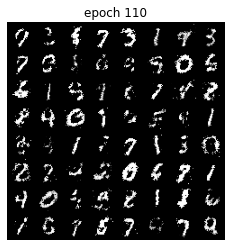

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 110 of 200
Generator loss: 0.01550551, Discriminator loss: 0.00772497


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 111 of 200
Generator loss: 0.01289987, Discriminator loss: 0.00695973


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 112 of 200
Generator loss: 0.01159930, Discriminator loss: 0.00846982


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 113 of 200
Generator loss: 0.01129367, Discriminator loss: 0.00701127


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.69it/s]

Epoch 114 of 200
Generator loss: 0.01512017, Discriminator loss: 0.00736487


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.25it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


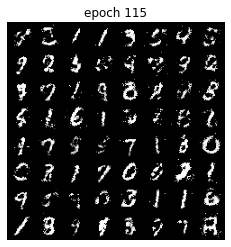

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 115 of 200
Generator loss: 0.01486307, Discriminator loss: 0.00701401


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 116 of 200
Generator loss: 0.01348420, Discriminator loss: 0.00810594


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 117 of 200
Generator loss: 0.01304317, Discriminator loss: 0.00779388


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 118 of 200
Generator loss: 0.01479967, Discriminator loss: 0.00760575


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 119 of 200
Generator loss: 0.01451979, Discriminator loss: 0.00860561


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.39it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


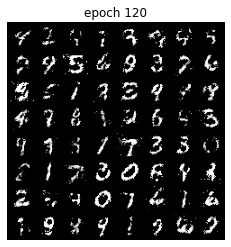

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.30it/s]

Epoch 120 of 200
Generator loss: 0.00890881, Discriminator loss: 0.00814370


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.25it/s]

Epoch 121 of 200
Generator loss: 0.00896820, Discriminator loss: 0.00856999


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 122 of 200
Generator loss: 0.01331651, Discriminator loss: 0.00869394


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 123 of 200
Generator loss: 0.01358547, Discriminator loss: 0.00706070


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 124 of 200
Generator loss: 0.01451633, Discriminator loss: 0.00627854


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.38it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


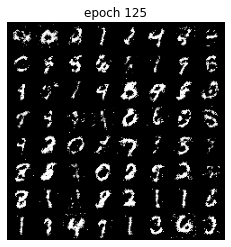

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 125 of 200
Generator loss: 0.01119172, Discriminator loss: 0.00746111


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.37it/s]

Epoch 126 of 200
Generator loss: 0.01669427, Discriminator loss: 0.00801727


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 127 of 200
Generator loss: 0.01390968, Discriminator loss: 0.00781134


  2%|█▍                                                                                | 2/117 [00:00<00:08, 13.50it/s]

Epoch 128 of 200
Generator loss: 0.01299084, Discriminator loss: 0.00869337


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.37it/s]

Epoch 129 of 200
Generator loss: 0.01472638, Discriminator loss: 0.00841082


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.40it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


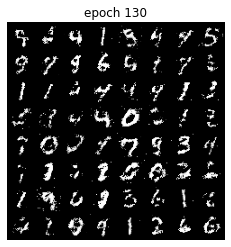

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.23it/s]

Epoch 130 of 200
Generator loss: 0.01329644, Discriminator loss: 0.00748540


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 131 of 200
Generator loss: 0.01126141, Discriminator loss: 0.00788863


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 132 of 200
Generator loss: 0.01264158, Discriminator loss: 0.00853901


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 133 of 200
Generator loss: 0.01063553, Discriminator loss: 0.00878933


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 134 of 200
Generator loss: 0.00989907, Discriminator loss: 0.00817414


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


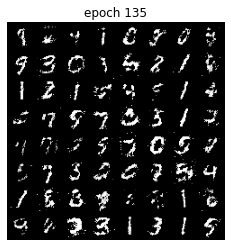

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 135 of 200
Generator loss: 0.01256082, Discriminator loss: 0.00864624


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 136 of 200
Generator loss: 0.01214987, Discriminator loss: 0.00820771


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 137 of 200
Generator loss: 0.01175563, Discriminator loss: 0.01006946


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 138 of 200
Generator loss: 0.01350431, Discriminator loss: 0.00811126


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 139 of 200
Generator loss: 0.01140351, Discriminator loss: 0.00913167


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


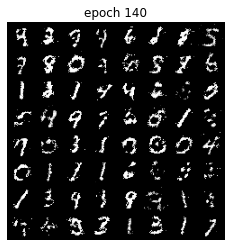

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.08it/s]

Epoch 140 of 200
Generator loss: 0.01463964, Discriminator loss: 0.00736554


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 141 of 200
Generator loss: 0.01275948, Discriminator loss: 0.00820995


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.91it/s]

Epoch 142 of 200
Generator loss: 0.01009848, Discriminator loss: 0.00961311


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.48it/s]

Epoch 143 of 200
Generator loss: 0.01042017, Discriminator loss: 0.00832011


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 144 of 200
Generator loss: 0.01194973, Discriminator loss: 0.00810693


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


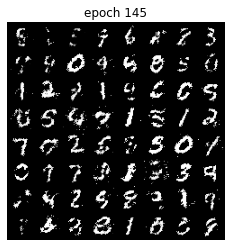

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 145 of 200
Generator loss: 0.01572419, Discriminator loss: 0.00809585


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 146 of 200
Generator loss: 0.01400641, Discriminator loss: 0.00956369


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 147 of 200
Generator loss: 0.01125529, Discriminator loss: 0.00827173


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 148 of 200
Generator loss: 0.01270419, Discriminator loss: 0.00777811


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 149 of 200
Generator loss: 0.01494356, Discriminator loss: 0.00750876


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.40it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


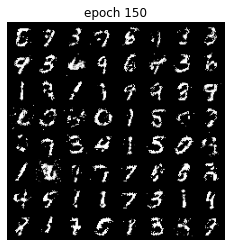

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.08it/s]

Epoch 150 of 200
Generator loss: 0.01522248, Discriminator loss: 0.00835419


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 151 of 200
Generator loss: 0.01409114, Discriminator loss: 0.00741759


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 152 of 200
Generator loss: 0.01207226, Discriminator loss: 0.00726311


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 153 of 200
Generator loss: 0.01263906, Discriminator loss: 0.00742499


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 154 of 200
Generator loss: 0.01361506, Discriminator loss: 0.00852329


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.38it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


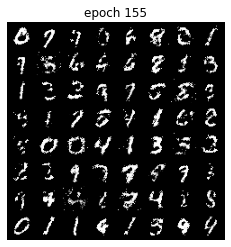

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.96it/s]

Epoch 155 of 200
Generator loss: 0.01396834, Discriminator loss: 0.00917426


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 156 of 200
Generator loss: 0.01004998, Discriminator loss: 0.00859187


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 157 of 200
Generator loss: 0.01256447, Discriminator loss: 0.00885343


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.74it/s]

Epoch 158 of 200
Generator loss: 0.01313024, Discriminator loss: 0.00857834


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 159 of 200
Generator loss: 0.01478974, Discriminator loss: 0.00832456


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.38it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


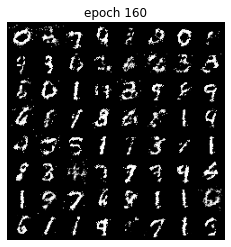

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.26it/s]

Epoch 160 of 200
Generator loss: 0.01287021, Discriminator loss: 0.00701242


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 161 of 200
Generator loss: 0.01252256, Discriminator loss: 0.00793772


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 162 of 200
Generator loss: 0.01388970, Discriminator loss: 0.00820625


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 163 of 200
Generator loss: 0.01193595, Discriminator loss: 0.00790672


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.75it/s]

Epoch 164 of 200
Generator loss: 0.01157869, Discriminator loss: 0.00775526


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


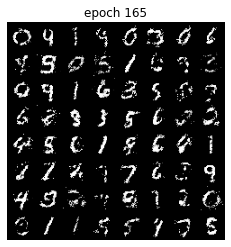

  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.91it/s]

Epoch 165 of 200
Generator loss: 0.01302222, Discriminator loss: 0.00834085


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.80it/s]

Epoch 166 of 200
Generator loss: 0.01264518, Discriminator loss: 0.00801907


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 167 of 200
Generator loss: 0.01355313, Discriminator loss: 0.00818636


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.25it/s]

Epoch 168 of 200
Generator loss: 0.01157894, Discriminator loss: 0.00889060


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 169 of 200
Generator loss: 0.00931036, Discriminator loss: 0.00839725


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.39it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


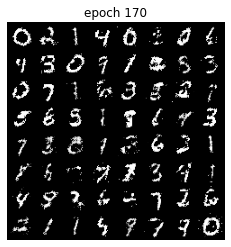

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.30it/s]

Epoch 170 of 200
Generator loss: 0.01356472, Discriminator loss: 0.00812779


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 171 of 200
Generator loss: 0.01354546, Discriminator loss: 0.00850298


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.02it/s]

Epoch 172 of 200
Generator loss: 0.01225871, Discriminator loss: 0.00968570


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 173 of 200
Generator loss: 0.01230326, Discriminator loss: 0.00868705


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 174 of 200
Generator loss: 0.01462976, Discriminator loss: 0.00771175


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.20it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


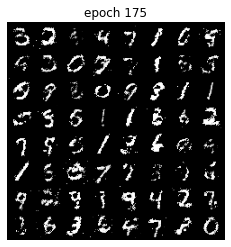

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 175 of 200
Generator loss: 0.01395107, Discriminator loss: 0.00953110


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 176 of 200
Generator loss: 0.01181735, Discriminator loss: 0.00925510


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.67it/s]

Epoch 177 of 200
Generator loss: 0.01311656, Discriminator loss: 0.00801394


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 178 of 200
Generator loss: 0.01389314, Discriminator loss: 0.00771891


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 179 of 200
Generator loss: 0.01161520, Discriminator loss: 0.00847033


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


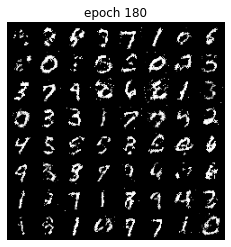

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.38it/s]

Epoch 180 of 200
Generator loss: 0.01040544, Discriminator loss: 0.00929905


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 181 of 200
Generator loss: 0.01591155, Discriminator loss: 0.00769237


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.43it/s]

Epoch 182 of 200
Generator loss: 0.01370661, Discriminator loss: 0.00804316


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 183 of 200
Generator loss: 0.01217651, Discriminator loss: 0.00957278


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 184 of 200
Generator loss: 0.01356980, Discriminator loss: 0.00878739


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.52it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


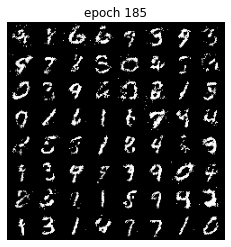

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 185 of 200
Generator loss: 0.01382022, Discriminator loss: 0.00866952


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 186 of 200
Generator loss: 0.01193534, Discriminator loss: 0.00877142


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 187 of 200
Generator loss: 0.01302177, Discriminator loss: 0.00768209


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 188 of 200
Generator loss: 0.01365925, Discriminator loss: 0.00788935


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 189 of 200
Generator loss: 0.01526453, Discriminator loss: 0.00829061


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


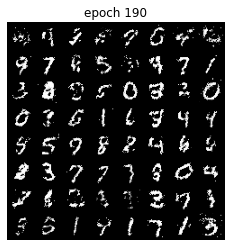

  2%|█▍                                                                                | 2/117 [00:00<00:09, 12.38it/s]

Epoch 190 of 200
Generator loss: 0.01237693, Discriminator loss: 0.00801504


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 191 of 200
Generator loss: 0.01319337, Discriminator loss: 0.00806768


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 192 of 200
Generator loss: 0.01323440, Discriminator loss: 0.00850133


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.19it/s]

Epoch 193 of 200
Generator loss: 0.01449407, Discriminator loss: 0.00883168


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.08it/s]

Epoch 194 of 200
Generator loss: 0.01136789, Discriminator loss: 0.00755019


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


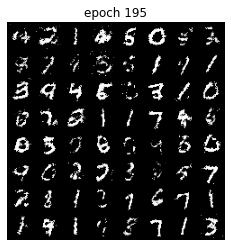

  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 195 of 200
Generator loss: 0.01187715, Discriminator loss: 0.00819845


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.85it/s]

Epoch 196 of 200
Generator loss: 0.01049881, Discriminator loss: 0.00878628


  2%|█▍                                                                                | 2/117 [00:00<00:07, 14.97it/s]

Epoch 197 of 200
Generator loss: 0.01253656, Discriminator loss: 0.00878570


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.55it/s]

Epoch 198 of 200
Generator loss: 0.01157992, Discriminator loss: 0.01013436


  2%|█▍                                                                                | 2/117 [00:00<00:07, 15.31it/s]

Epoch 199 of 200
Generator loss: 0.01317312, Discriminator loss: 0.00777570


 99%|███████████████████████████████████████████████████████████████████████████████▎| 116/117 [00:07<00:00, 15.50it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


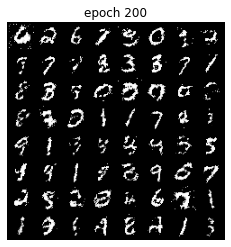

Epoch 200 of 200
Generator loss: 0.01176709, Discriminator loss: 0.00890989


In [14]:
torch.manual_seed(7777)
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

# def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
#     g_loss = criterion(output, true_label)
#     return g_loss
    ######################################
    
# def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
#     d_loss = criterion(output, true_label)
#     return d_loss
    ######################################
    
epochs = 200
    
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        if bi == 116:
            break
        real_images, _ = data
        real_images = real_images.reshape(batch_size, -1).to(device)
        
        #train discriminator
        label_r = label_real(batch_size).to(device)
        label_f = label_fake(sample_size).to(device)
        
        out1 = discriminator(real_images)
        loss_r = criterion(out1, label_r)
        
        fake_images1 = generator(noise)
        out2 = discriminator(fake_images1)
        loss_f = criterion(out2, label_f)
#         print('discriminator fake loss', loss_f.item())
        loss_d = (loss_r + loss_f)
    
        optim_d.zero_grad()
        
        loss_d.backward()
        optim_d.step()
        
        #train generator
        fake_images2 = generator(noise)
        label_g = label_real(sample_size).to(device)
        out3 = discriminator(fake_images2)
        loss_g = criterion(out3, label_g)
#         print('generator loss:', g_loss.item())
    
        optim_g.zero_grad()
        
        loss_g.backward()
        optim_g.step()
    ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.item())
    losses_d.append(epoch_loss_d.item())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

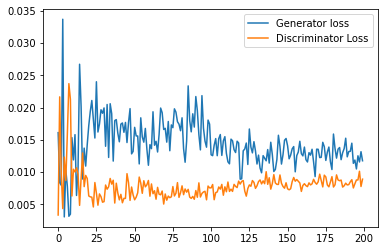

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')